# Feature Engineering
- sample features are the keys to machine learning as they determine how well a ML algorithm can learn
- it is absolutely important that we examine and preprocess a dataset before we feed it to a ML algorithm
- feature engineering involves from feature processing to dealing with missing values to properly encoding features and selecting the best features
- the goal of feature engineering is simply to make your data better suited to the problem at hand plus:
    - improve a model's predictive performance
    - reduce computational or data needs
    - improve interpretability of the results

### Dealing with missing data
- it's not uncommon to miss certain feature values for many reasons
    - error in data collection process
    - certain measurements may not be applicable
    - particular fields  could have been simply left blank in survey
- missing values are usually missing or blank or NaN or NULL
- ML algorithm can result unpredictable results if we simply ignore missing values

#### Identify missing values
- first, identify missing values and deal with them

In [1]:
import pandas as pd
from io import StringIO
import numpy as np

In [2]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
# StringIO function let's us read csv_data as if it's a file

In [3]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
# find the # of null values per column
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### Eliminating training examples or features with missing values
- one of the easiest way to deal with the missing data is simply to remove the feature (columns) or training examples (rows) from the dataset entirely
- this is usually done when there's plenty of examples and features

In [5]:
# removing examples; return's new DataFrame objects after dropping all the rows in NaN
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# drop rows that have fewer than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# drop rows where NaN appear in specific columns
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values
- often dropping an entire feature column is not practicle
    - we may lose too much valuable information
- we can use interploation techniques to estimate the missing values from other training examples

### mean imputation
- simply replace the missing value with the mean value of the entire feature column
- use `SimpleImputer` class from scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
- different strategies to fill missing values:
    - mean, most_frequet, median, constant

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# our original DataFrame
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [13]:
# impute missing values via the column mean
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si = si.fit(df.values)
imputed_data = si.transform(df.values)

In [14]:
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [15]:
# another approach; returns a new DataFrame
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [16]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


## Using transformed data using estimaters
- the whole data can be transformed first and split to train and test set
- new data must be tranformed using the same technique if the model is deployed
![](./images/ML-Transformed-data.png)

## Handling categorical data
- there are two types of categorical data
- **ordinal**
    - categorical values that can be sorted or ordered
    - e.g., T-shirt size: XS < S < M < L < XL < XXL
- **nominal**
    - categorical values that don't imply any order
    - e.g., color values: blue, green, etc.
    - gender: male or female

In [17]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']

In [18]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Mapping ordinal features
- no convenient function/API to derive the order of ordinal features
- just define the mapping manually and use the mapping

In [19]:
size_mapping = {'M':1, 'L':2, 'XL':3}
df['size'] = df['size'].map(size_mapping)

In [20]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [21]:
# get the original string representation
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels
- scikit-learn classifiers convert class labels to integers internally
- best practice to encode class labels explictly as integers

In [22]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

In [23]:
y

array([1, 0, 1])

### one-hot encoding on nominal features
- if nominal features encoded the same way as ordinal using numeric order ML classifiers may assume order in data and may lead to not optimal results
    - e.g. {'green': 1, 'red': 2, 'blue': 3}
- workaround is one-hot encoding
- create a new dummy feature for each unique value in the nominal feature column
    - use binary values for each feature; 1 represents the feature and 0 doesn't
- use `OneHotEncoder` function https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
X = df[['color', 'size', 'price']].values

In [26]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [27]:
color_ohe = OneHotEncoder()

In [28]:
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [29]:
# use ColumnTransformer to transorm the whole dataset with multiple columns
from sklearn.compose import ColumnTransformer

In [30]:
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
    ])

In [31]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [32]:
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [33]:
# more convenient way to create dummy features via one-hot encoding is us get_dummies method in pandas
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## Wine dataset
- let's apply preprocessing technqiues to Wine dataset found in UCI
- https://archive.ics.uci.edu/ml/datasets/Wine
- 178 wine samples with 13 features describing their different chemical properties

In [36]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url, header=None)

In [37]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [38]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [39]:
print('Unique Class labels', np.unique(df_wine['Class label']))

Unique Class labels [1 2 3]


In [40]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Bringing features onto the same scale
- two common approaches to bringing different features onto the same scale:
    1. **normalization**
        - rescaling the features to a range of [0, 1] (**min-max scaling**)
    2. **standarization**
        - we've already used `StandardScaler`
        - `RobustScaler` is robust to outliers and can be good choice if the dataset is prone to overfitting
- to normalize the features we can simply apply the min-max scaling to each feature column
- new value, $x^{i}_{norm}$ of an example $x^i$ can be calculated as follows: 
    $x^{i}_{norm} = \frac {x^i - x_{min}}{x_{max} - x_{min}}$
- use `MinMaxScaler` implemented in scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- let's noramalize and scale Wine dataset

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [42]:
X = df_wine.iloc[:, 1:].values

In [43]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [44]:
y = df_wine['Class label'].values

In [45]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [46]:
mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

In [47]:
X_norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [48]:
rs = RobustScaler()
X_robust = rs.fit_transform(X)

## Selecting meaningful features
- overfitting occurs when a model performs much better on a training dataset thatn the test dataset
    - the model has high variance
- common solutions to reduce the generalization errors are:
    1. collect more training data
    2. introduce a penalty for complexity via regularization
    3. choose a simpler model with fewer parameters
    4. reduce the dimensionality of the data
- for regularized models in scikit-learn that support L1 regularization, we can simply set the `penalty` parameter to `'l1'` to obtain a sparse solution
- `LogisticRegression` classifier a regularized model
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
# let's split the normalized dataset
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, 
                                     test_size=0.3, 
                                     random_state=0, 
                                     stratify=y)

In [51]:
# let's traing and test normalized dataset with LR
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_norm, y_train_norm)
print('Training accuracy:', lr.score(X_train_norm, y_train_norm))
print('Test accuracy:', lr.score(X_test_norm, y_test_norm))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [52]:
# let's split the robust scaled dataset
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(X_robust, y, 
                                     test_size=0.3, 
                                     random_state=0, 
                                     stratify=y)

In [53]:
# let's traing and test robust dataset with LR
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_robust, y_train_robust)
print('Training accuracy:', lr.score(X_train_robust, y_train_robust))
print('Test accuracy:', lr.score(X_test_robust, y_test_robust))

Training accuracy: 1.0
Test accuracy: 1.0


## Sequential feature selection algorithms
- select subset of the original features based on criteria such as accuracy
- **dimensionality reduction** via feature selection is especially useful for unregularized models
- dimensionaliry reduction can have many advantages in real-world applications
    - cheaper to collect features
    - faster computation
    - avoid overfitting
    - reduce the generalization error
- sequential feature selection algorithms are a family of greedy search algorithms
- a classic selection algorithm is **sequential backward selection**
- two types of search algorithms can be employed
    1. **greedy algorithm** can be used locally optimal choices at each state of a combinatorial search problem
        - generally yields a suboptimal solution
    2. **exhaustive search algorithms** evaluates all possible combinations and are guaranteed to find the optimal solution
        - not feasible in practice due to computational complexity

### Sequential Backward Selection (SBS) algorithm
- can be called backward elimination
- sequentially remove features from the full features subset until the new feature subspace contains the desired number of features
- inorder to determine which feature is to be removed at each stage, we define a criterion function such as error rate, that we want to minimize

### Sequential Forward Selection (SFS) algorithm
- sequentially add features until the new feature subspace contains the desired number of features
- inorder to determine which feature to add at each stage, we define a criterion function such as accuracy that we want to maximize or error rate that we want to minimize

### SBS implementation
- scikit learn doesn't provide sequential feature selection algorithm
- we can implement one as shown below

In [54]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        """
        estimator = model
        k_features = minimum features
        """
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        self.scores_ = []

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

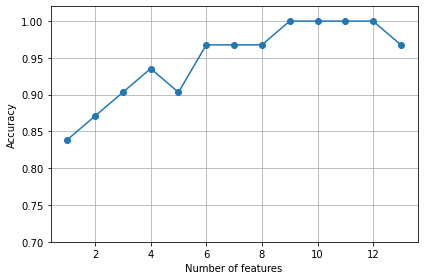

In [56]:
# let's test SBS implemenation using the KNN classifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_robust, y_train_robust)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [57]:
# what is the smallest feature subset which yielded the 100% accuracy?
list(sbs.subsets_)

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 10),
 (0, 1, 2, 3, 5, 6, 10),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 6),
 (0, 1, 2, 6),
 (0, 1, 6),
 (0, 6),
 (0,)]

In [58]:
# subset index 4 has 9 feature subset
k9 = list(sbs.subsets_[4])

In [59]:
k9

[0, 1, 2, 3, 4, 5, 6, 10, 11]

In [60]:
print(df_wine.columns[1:][[k9]])

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines'],
      dtype='object')


/Users/rbasnet/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [61]:
# let's evaluate the performance of the KNN classifier on the original test dataset
knn.fit(X_train_robust, y_train_robust)
print('Training accuracy: %.4f'%knn.score(X_train_robust, y_train_robust))

Training accuracy: 0.9677


In [62]:
# let's use the selected best feature subset to see if the accuracy is improved...
knn.fit(X_train_robust[:, k9], y_train_robust)
print('Training accuracy:', knn.score(X_train_robust[:, k9], y_train_robust))
print('Test accuracy:', knn.score(X_test_robust[:, k9], y_test_robust))

Training accuracy: 0.9435483870967742
Test accuracy: 0.9444444444444444


## Feature ranking
- if the features are ranked based on their respective importances then the top features can be selected

### Tree-based feature ranking and selection
- there are several techniques for feature selection - https://scikit-learn.org/stable/modules/feature_selection.html
- tree-based estimaters and ensemble based classifiers such as random forest can be sued to computer impurity-based feature importances
- Random Forest can be used to measure the importance of features as the averaged impurity decrease computed from all decision trees in the forest
    - doesn't make any assumption on whether dataset is linearly separable
- RF implentation of scikit-learn provides `feature_importances_` attribute after fitting `RandomForestClassifier`
- the code below trains RF of 500 tress on Wine dataset and rank the 13 features by their respective importance measures

 1) Proline                        0.187187
 2) Flavanoids                     0.157839
 3) Color intensity                0.137384
 4) Alcohol                        0.112509
 5) OD280/OD315 of diluted wines   0.109811
 6) Hue                            0.089735
 7) Total phenols                  0.064850
 8) Malic acid                     0.040078
 9) Magnesium                      0.031063
10) Alcalinity of ash              0.025245
11) Proanthocyanins                0.017486
12) Ash                            0.015996
13) Nonflavanoid phenols           0.010816


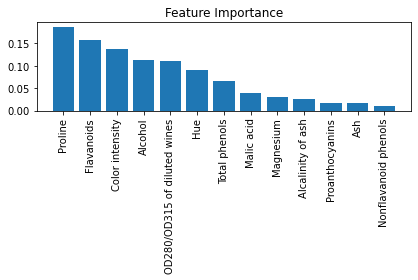

In [63]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.2,
                             random_state=1)
    
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# print all the features and their importances in highest to lowest importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

# plot the histogram bar chart
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [66]:
# comparing with SBS best features
print(df_wine.columns[1:][[k9]])

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines'],
      dtype='object')


/Users/rbasnet/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


### RF feature ranking Gotcha
- if two or more features are highly correlated, one feature may be ranked very highly while the information on the other feature(s) may not be fully captured
- on the other hand, we don't need to be concerned about this problem if we are merely interested in the predictive performance of a model rather than the interpretation of feature importance values


### SelectFromModel
- scikit-learn framework also provides `SelectFromModel` class that selects features based on a user-specified threshold after model fitting
- one caveat is should know the threshold
- e.g. we could use threshold to `0.1` and keep features whose importance is greater or equal to the feature
    - RF would keep reduce the feature set to the five most important features for the Wine dataset

In [67]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

In [68]:
X_selected.shape

(142, 5)

In [69]:
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [70]:
# print the top features meeting the threshold criterion
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.187187
 2) Flavanoids                     0.157839
 3) Color intensity                0.137384
 4) Alcohol                        0.112509
 5) OD280/OD315 of diluted wines   0.109811
